# Canny Edge Detector

## Background

In this project you have to implement a method for detecting edges on the images. One of the most popular ways to deal with this task is [Canny's algorithm](https://en.wikipedia.org/wiki/Canny_edge_detector). It has several stages:
1. Image smothing (to reduce the noise)
2. Gradient calculation (its orientation and magnitude)
3. Non-max suppression (to thin out the edges)
4. Double threshold
5. Edge Tracking by Hysteresis.

Your goal is to perform each stage of the algorithm. After applying these stages to some input image you will see the following results:

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Input" src="whitepawn.jpg" width="320">
    <br>
    <em style="color: black">Input image</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Result" src="canny.jpg" width="320">
    <br>
    <em style="color: black">Result</em>
  </p> 
</td>
</tr></table>

All the code you should complete will be at the same level of indentation as the instruction comment.

You will need to use some of the following functions:
```python
convolve(image, kernel, padding)                #apply convolution to the image (matrix)
get_gaussian_kernel(kernel_size)                #get gaussian kernel of selected size
get_sobel_kernel(kernel_size, direction)        #get Sobel kernel of selected size and direction (if True, horisontal)
non_max_suppression(intensity, orientation)     #apply non-max supperession on given gradient intensity matrix using the matrix of gradient orientations
threshold(img, low_threshold, high_threshold, weak, strong) #double threshold function
hysteresis(img, weak, strong)                   #hysteresis function to choose if weak pixel should be included in edges

```

This exercise will require you to combine these functions correctly. You will find more details about these functions below



### How to submit
Edit the code in the cell below to complete the assignment.
Once you are finished and happy with it, press the *Submit Assignment* button at the top of this notebook.

Please don't change any of the function names, as these will be checked by the grading script.


In [1]:
# PACKAGES
# First of all, run this cell once to load the dependancies.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import convolve, get_gaussian_kernel, get_sobel_kernel, non_max_suppression, threshold, hysteresis

In [2]:
# Image reading
# Use this function to read images and 

def processImage(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

In [20]:
# GRADED FUNCTIONS
# You should edit this cell.

# In this function, you will return the edges for the image (matrix), the result of application 
# of Canny's algorithm
# It should have the following signature
# def get_canny_edges(img) : # The parameter img is an image that is passed to the function.

def get_canny_edges(img) :
    """
    # Use convolve to apply gaussian filter from get_gaussian_kernel to the image
    denoised = ???
    # Get Sobel kernels and compute horizontal and vertical gradients using convolve function
    horizontal_grad = ???
    vertical_grad = ???
    # Compute the intensity and direction of gradients using get_intensity_and_direction
    # NOTE: you should implement it below
    grad_intensity, grad_direction = ???
    # Use this matrices in non-max supression method to make thinner edges
    thin_edges = ???
    # Discard irrelevant pixels using double threshold method
    thresholded = ???
    # Use hysteresis to define which weak pixels should be included in the final results
    # NOTE: parameters "weak" and "strong" should be the same for threshold and hysteresis
    final_result = ???
    return final_result
    """
    # your code here
    gauss_kernel = get_gaussian_kernel(3)
    denoised = convolve(img, gauss_kernel, padding=1)
    kernelX = get_sobel_kernel(3)
    horizontal_grad = convolve(denoised, kernelX, padding=1)
    kernelY = get_sobel_kernel(3, False)
    vertical_grad = convolve(denoised, kernelY, padding=1)
    grad_intensity, grad_direction = get_intensity_and_direction(horizontal_grad, vertical_grad)
    thin_edges = non_max_suppression(grad_intensity, grad_direction)
    thresholded = threshold(thin_edges)
    final_result = hysteresis(thresholded)
    return final_result

# In this function you will return gradient intensity and direction (in radians)
def get_intensity_and_direction(horizontal_grad, vertical_grad):    
    # your code here
    intensity = np.sqrt(horizontal_grad**2 + vertical_grad**2)
    #direction = np.arctan2(horizontal_grad, vertical_grad)
    direction = np.arctan2(vertical_grad, horizontal_grad)
    return intensity, direction

### These cells will be used to test your submission
You can test your solution there, but other tests are hidden from you

In [21]:
from nose.tools import assert_equal, assert_raises, assert_greater
test_img1 = processImage("circle.jpg")
result1 = get_canny_edges(test_img1)
assert_equal(result1.shape[0],test_img1.shape[0])
assert_equal(result1.shape[1],test_img1.shape[1])

In [22]:
test_img3 = processImage("asd.jpg")
result3 = get_canny_edges(test_img3)
assert_greater(result3[6,7], 0)

In [23]:
"""Check that get_canny_edges relies on get_intensity_and_direction."""
orig_get_intensity_and_direction = get_intensity_and_direction
del get_intensity_and_direction
try:
    assert_raises(NameError, get_canny_edges, test_img1)
except AssertionError:
    raise AssertionError("get_canny_edges does not use get_intensity_and_direction")
finally:
    get_intensity_and_direction = orig_get_intensity_and_direction

In [24]:

assert_greater((result1>0).sum(), 1500)
assert_greater(1600, (result1>0).sum())

# There you can see examples for each stage of the algorithm

In [3]:
img = processImage("whitepawn.jpg")

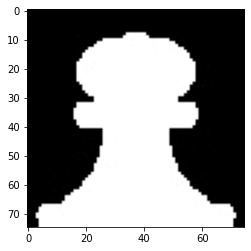

In [4]:
plt.imshow(img, cmap='gray')

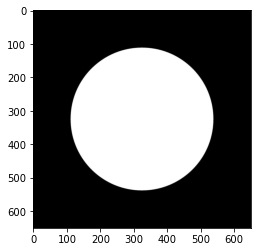

In [5]:
img2 = processImage("circle.jpg")
plt.imshow(img2, cmap='gray')

## Gaussian filtering

The equation for a Gaussian filter kernel of size $(2k+1)\times(2k+1)$ is given by:
$$ H_{i,j} = \frac{1}{2\pi\sigma^2}\exp\left(-\frac{\left(i-(k+1)\right)^2+\left(j-(k+1)\right)^2}{2\sigma^2}\right); 1\le i, j\le(2k+1)
$$

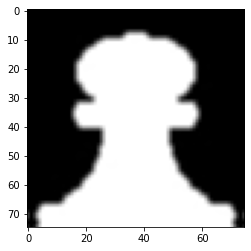

In [6]:
gauss_kernel = get_gaussian_kernel(3)
blurred = convolve(img, gauss_kernel, padding=1)
plt.imshow(blurred, cmap='gray')

## Sobel filtering (horizontal gradient)

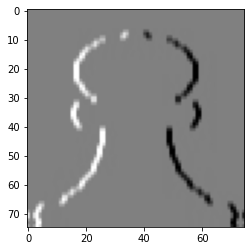

In [7]:
kernelX = get_sobel_kernel(3)
grad_pawn_x = convolve(img, kernelX, padding=1)
plt.imshow(grad_pawn_x, cmap='gray')

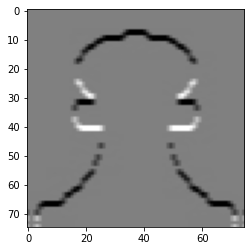

In [8]:
kernelY = get_sobel_kernel(3, False)
grad_pawn_y = convolve(img, kernelY, padding=1)
plt.imshow(grad_pawn_y, cmap='gray')

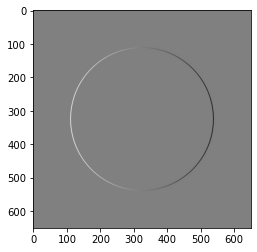

In [9]:
grad_circle_x = convolve(img2, kernelX, padding=1)
plt.imshow(grad_circle_x, cmap='gray')

## Sobel filtering (vertical gradient)

You should get results similar to:
<p align="center" style="padding: 10px">
<img alt="Input" src="grad_pawn_vertical.jpg" width="520">
</p> 

## Gradient magnitude (intensity)

Gradient intensity is:
$$ \left|G\right| = \sqrt{I_x^2 + I_y^2}$$

The images below show computed gradient magnitude (intensity)
<p align="center" style="padding: 10px">
<img alt="Input" src="grad_magnitude_pawn.jpg" width="320">
</p> 

<p align="center" style="padding: 10px">
<img alt="Input" src="grad_magnitude_circle.jpg" width="320">
</p> 

## Gradient direction

Gradient direction is an angle:
$$ \left|G\right| = \arctan\left(\frac{I_x}{I_y}\right)$$

Gradient direction is best displayed for the circle image:
<p align="center" style="padding: 10px">
<img alt="Input" src="grad_orientation_circle.jpg" width="520">
</p> 

## Non max supression

Ideally, we want to have thin edges on the final image. For this, we can use non-maximum suppression method to reduce edge thickness.
This main idea is quite clear: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value along the edge directions from gradient orientation matrix.

The image below shows result of using ```non_max_supression``` function
<p align="center" style="padding: 10px">
<img alt="Input" src="thin_edges.jpg" width="520">
</p> 

## Threshold

The double threshold step aims at identifying 3 kinds of pixels: strong, weak, and non-relevant:
* Strong pixels are pixels that have very high intensity and will be included to the final edge.
* Weak pixels are pixels that have an intensity value that is not enough to be considered as strong ones, but yet not small enough to be considered as non-relevant for the edge detection.
* Irrelevant pixels

<img alt="threshold" src="threshold.jpg">

## Hysterisis

Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one

If your are not sure which parameters to use for the previous functions, try default ones first
If you do everything right, you will get final result:
<p align="center" style="padding: 10px">
<img alt="Input" src="canny.jpg" width="520">
</p> 